In [1]:
# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
# import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [2]:
# reading the dataset

data = pd.read_csv('./data/fogo-cruzado.csv', encoding='latin-1')

# check the shape of the data
data.shape

(23689, 23)

In [3]:
# describing the data
data.describe()

,id_ocorrencia,latitude_ocorrencia,longitude_ocorrencia,presen_agen_segur_ocorrencia,qtd_morto_civil_ocorrencia,qtd_morto_agen_segur_ocorrencia,qtd_ferido_civil_ocorrencia,qtd_ferido_agen_segur_ocorrencia,fonte_ocorrencia,estado_id,cidade_id,cod_ibge_cidade,populacao_cidade,area_cidade,densidade_demo_cidade,cod_ibge_estado
count,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.0,23689.000000,2.368900e+04,2.368900e+04,23689.000000,23689.000000,23689.0
mean,15422.612563,-22.852650,-43.292122,0.227532,0.173329,0.015661,0.149310,0.030267,0.367259,19.0,3652.639706,3.304001e+06,4.155671e+06,83215.822956,18.797177,33.0
std,9355.107969,0.073667,0.160766,0.419248,0.523684,0.125852,0.523304,0.190240,0.571280,0.0,17.725359,1.210367e+03,2.773013e+06,47772.469308,78.473042,0.0
min,16.000000,-23.063410,-43.875116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.0,3602.000000,3.300456e+06,3.073200e+04,1939.000000,1.170000,33.0
25%,6708.000000,-22.905251,-43.373074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.0,3643.000000,3.303500e+06,8.550480e+05,24771.000000,4.310000,33.0
50%,15539.000000,-22.861285,-43.297520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.0,3661.000000,3.304557e+06,6.320446e+06,119746.000000,5.270000,33.0
75%,23702.000000,-22.811232,-43.215534,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.0,3661.000000,3.304557e+06,6.320446e+06,119746.000000,5.270000,33.0
max,31382.000000,-22.474852,-42.614947,1.000000,12.000000,2.000000,15.000000,3.000000,2.000000,19.0,3678.000000,3.305752e+06,6.320446e+06,119746.000000,585.100000,33.0


In [4]:
# checking the head of the data

data.head()

,id_ocorrencia,local_ocorrencia,latitude_ocorrencia,longitude_ocorrencia,data_ocorrencia,hora_ocorrencia,presen_agen_segur_ocorrencia,qtd_morto_civil_ocorrencia,qtd_morto_agen_segur_ocorrencia,qtd_ferido_civil_ocorrencia,...,cidade_id,nome_cidade,cod_ibge_cidade,gentilico_cidade,populacao_cidade,area_cidade,densidade_demo_cidade,nome_estado,uf_estado,cod_ibge_estado
0,8758,Maré; Rio de Janeiro - RJ; Brasil,-22.857496,-43.243015,09/01/2018,15:57:00,0,0,0,0,...,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33
1,10431,R. Alice - Laranjeiras; Rio de Janeiro - RJ; B...,-22.935377,-43.194631,19/01/2018,20:54:00,0,0,0,0,...,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33
2,10430,Areia Branca; Belford Roxo - RJ; Brasil,-22.748600,-43.410628,19/01/2018,18:37:00,0,0,0,0,...,3602,Belford Roxo,3300456,belford-roxense,469332,7782,6.03,Rio de Janeiro,RJ,33
3,16,Santa Cruz; Rio de Janeiro - RJ; Brasil,-22.919651,-43.684387,05/07/2016,6:02:00,1,0,1,0,...,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33
4,17,Rua Barão - Praça Seca; Rio de Janeiro - RJ; B...,-22.898642,-43.352360,05/07/2016,13:44:00,1,0,0,0,...,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33


Verificando se existem valores nulos

In [5]:
data.isnull().sum()

id_ocorrencia                       0
local_ocorrencia                    0
latitude_ocorrencia                 0
longitude_ocorrencia                0
data_ocorrencia                     0
hora_ocorrencia                     0
presen_agen_segur_ocorrencia        0
qtd_morto_civil_ocorrencia          0
qtd_morto_agen_segur_ocorrencia     0
qtd_ferido_civil_ocorrencia         0
qtd_ferido_agen_segur_ocorrencia    0
fonte_ocorrencia                    0
estado_id                           0
cidade_id                           0
nome_cidade                         0
cod_ibge_cidade                     0
gentilico_cidade                    0
populacao_cidade                    0
area_cidade                         0
densidade_demo_cidade               0
nome_estado                         0
uf_estado                           0
cod_ibge_estado                     0
dtype: int64

Separação da data em campos Ano, Mês e Dia

In [6]:
data['data_ocorrencia'] = pd.to_datetime(data['data_ocorrencia'], errors='coerce', dayfirst=True)
data['year'], data['month'], data['day'] = data['data_ocorrencia'].dt.year, data['data_ocorrencia'].dt.month, data['data_ocorrencia'].dt.day
data.head()

,id_ocorrencia,local_ocorrencia,latitude_ocorrencia,longitude_ocorrencia,data_ocorrencia,hora_ocorrencia,presen_agen_segur_ocorrencia,qtd_morto_civil_ocorrencia,qtd_morto_agen_segur_ocorrencia,qtd_ferido_civil_ocorrencia,...,gentilico_cidade,populacao_cidade,area_cidade,densidade_demo_cidade,nome_estado,uf_estado,cod_ibge_estado,year,month,day
0,8758,Maré; Rio de Janeiro - RJ; Brasil,-22.857496,-43.243015,2018-01-09,15:57:00,0,0,0,0,...,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2018,1,9
1,10431,R. Alice - Laranjeiras; Rio de Janeiro - RJ; B...,-22.935377,-43.194631,2018-01-19,20:54:00,0,0,0,0,...,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2018,1,19
2,10430,Areia Branca; Belford Roxo - RJ; Brasil,-22.748600,-43.410628,2018-01-19,18:37:00,0,0,0,0,...,belford-roxense,469332,7782,6.03,Rio de Janeiro,RJ,33,2018,1,19
3,16,Santa Cruz; Rio de Janeiro - RJ; Brasil,-22.919651,-43.684387,2016-07-05,6:02:00,1,0,1,0,...,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2016,7,5
4,17,Rua Barão - Praça Seca; Rio de Janeiro - RJ; B...,-22.898642,-43.352360,2016-07-05,13:44:00,1,0,0,0,...,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2016,7,5


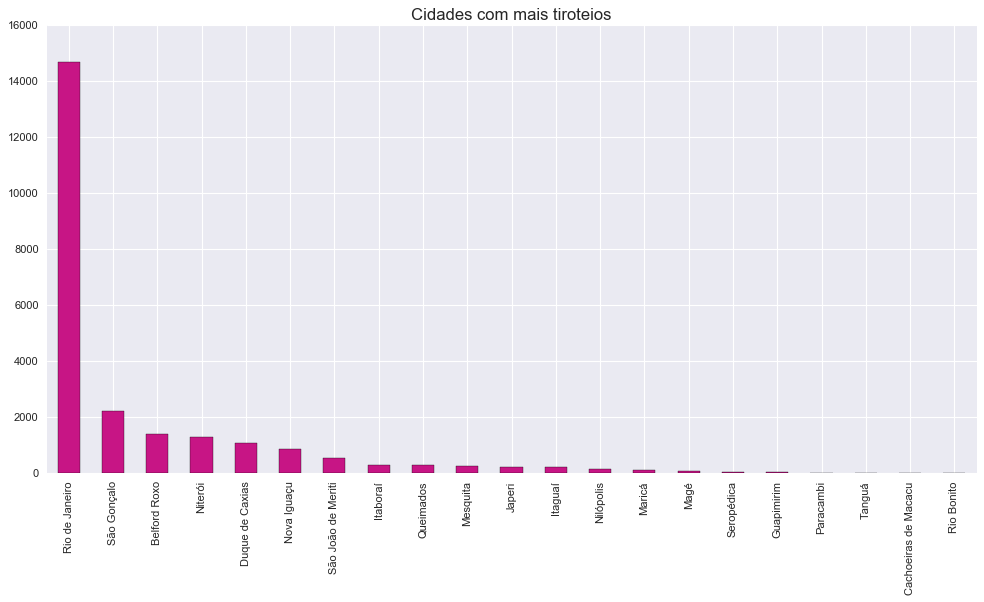

In [16]:
plt.style.use('seaborn')

data['nome_cidade'].value_counts().plot.bar(color = 'mediumvioletred', figsize = (15, 7))

plt.title('Cidades com mais tiroteios',fontsize = 15)

plt.xticks(rotation = 90)
plt.show()

In [20]:
data_crimes = pd.read_csv('./data/BaseDPEvolucaoMensalCisp.csv', sep=';', encoding='latin-1')

c:\users\deizi\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
data_crimes.head()

,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0,...,2,0,0,0,0,0,66,5,578,3
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,...,6,0,1,0,0,3,51,9,441,3
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,...,2,1,0,0,0,3,64,11,637,3
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,6,...,2,1,0,0,0,6,56,27,473,3
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,4,...,1,3,0,0,0,4,5,23,147,3


In [23]:
data.isnull().sum()

CISP;mes;vano;mes_ano;AISP;RISP;munic;mcirc;Regiao;hom_doloso;lesao_corp_morte;latrocinio;hom_por_interv_policial;tentat_hom;lesao_corp_dolosa;estupro;hom_culposo;lesao_corp_culposa;roubo_comercio;roubo_residencia;roubo_veiculo;roubo_carga;roubo_transeunte;roubo_em_coletivo;roubo_banco;roubo_cx_eletronico;roubo_celular;roubo_conducao_saque;roubo_apos_saque;roubo_bicicleta;outros_roubos;total_roubos;furto_veiculos;furto_transeunte;furto_coletivo;furto_celular;furto_bicicleta;outros_furtos;total_furtos;sequestro;extorsao;sequestro_relampago;estelionato;apreensao_drogas;posse_drogas;trafico_drogas;apreensao_drogas_sem_autor;recuperacao_veiculos;apf;aaapai;cmp;cmba;ameaca;pessoas_desaparecidas;encontro_cadaver;encontro_ossada;pol_militares_mortos_serv;pol_civis_mortos_serv;indicador_letalidade;indicador_roubo_rua;indicador_roubo_veic;registro_ocorrencias;fase    0
dtype: int64

In [22]:
data['munic'].value_counts().plot.bar(color = 'mediumvioletred', figsize = (15, 7))

plt.title('Cidades com mais crimes',fontsize = 15)

plt.xticks(rotation = 90)
plt.show()

KeyError: 'munic'